In [2]:
#Importing necessary liberaries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)
#pd.set_option('max_columns', 30)
#from mpl_toolkits.mplot3d import Axes3D
#from sklearn.decomposition import PCA 
#from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
#reading the csv using pandas
data = pd.read_csv('cleaned_dataset.csv', sep=';')


In [4]:
#checking the data size
data.shape

(3472, 21)

In [5]:
#Double check that there is no missing data
data.isnull().sum()

LoanId                          0
AmountDisbursed                 0
Interest                        0
LoanBalance                     0
BorrowDate                      0
Product                         0
Branch                          0
ClearDate                       0
CustomerId                      0
Gender                          0
LoanLimit                       0
CreditScore                     0
loan_repayment_txn_count        0
loan_repayment_total_paid       0
loan_repayment_first_payment    0
loan_repayment_last_payment     0
loan_overpayment                0
MissedInstalments               0
Industry                        0
BusinessType                    0
YearEstablished                 0
dtype: int64

In [6]:
#checking the data type of each column
data.dtypes

LoanId                           int64
AmountDisbursed                  int64
Interest                         int64
LoanBalance                      int64
BorrowDate                      object
Product                         object
Branch                          object
ClearDate                       object
CustomerId                       int64
Gender                          object
LoanLimit                        int64
CreditScore                      int64
loan_repayment_txn_count         int64
loan_repayment_total_paid        int64
loan_repayment_first_payment    object
loan_repayment_last_payment     object
loan_overpayment                 int64
MissedInstalments                int64
Industry                        object
BusinessType                    object
YearEstablished                  int64
dtype: object

In [7]:
#changing loan repayment dates from type string into type date
data ['loan_repayment_first_payment']= pd.to_datetime(data['loan_repayment_first_payment'])
data ['loan_repayment_last_payment']= pd.to_datetime(data['loan_repayment_last_payment'])


C:\Users\amr_x\AppData\Local\Temp\ipykernel_21992\338593591.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data ['loan_repayment_first_payment']= pd.to_datetime(data['loan_repayment_first_payment'])
C:\Users\amr_x\AppData\Local\Temp\ipykernel_21992\338593591.py:3: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data ['loan_repayment_last_payment']= pd.to_datetime(data['loan_repayment_last_payment'])


In [10]:
#Renaming the (product) column
data.rename(columns = {'Product':'loan_period'})

,LoanId,AmountDisbursed,Interest,LoanBalance,BorrowDate,loan_period,Branch,ClearDate,CustomerId,Gender,LoanLimit,CreditScore,loan_repayment_txn_count,loan_repayment_total_paid,loan_repayment_first_payment,loan_repayment_last_payment,loan_overpayment,MissedInstalments,Industry,BusinessType,YearEstablished
0,951920,6000,1750,77500,29.11.2025,5 weeks credit ease,engineer,01.03.2026,1819,female,80000,3500,1,500,2025-11-29,2025-11-29,0,50,food & hospitality,green grocery (fruit/vegetables),2017
1,951902,4000,1250,52500,28.11.2025,5 weeks credit ease,molo,01.02.2026,1818,female,96000,2500,1,1550,2025-11-28,2025-11-28,0,40,food & hospitality,retail shop,2019
2,949962,4000,1250,52500,26.11.2025,5 weeks credit ease,engineer,31.12.2025,1815,female,80000,3500,1,1350,2025-11-26,2025-11-26,0,40,food & hospitality,green grocery (fruit/vegetables),2014
3,949189,4000,1250,52500,25.11.2025,5 weeks credit ease,molo,30.12.2025,1814,female,100000,1500,1,1000,2025-11-25,2025-11-25,0,40,food & hospitality,green grocery (fruit/vegetables),2018
4,948984,4000,1250,52500,24.11.2025,5 weeks credit ease,molo,29.12.2025,1813,female,100000,1500,1,1550,2025-11-24,2025-11-24,0,40,business & information,bureau & publishing services,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,730377,15000,5600,0,28.09.2024,7 weeks credit ease,molo,30.09.2024,782,female,390000,2500,115,20600,2024-07-31,2024-09-28,0,0,"agriculture, forestry & fishing",green grocery (fruit/vegetables),2016
3468,690736,11000,4200,0,24.06.2024,7 weeks credit ease,molo,24.06.2024,782,male,110000,2500,140,15200,2024-06-20,2024-07-31,0,0,wholesale & retail trade,green grocery (fruit/vegetables),2019
3469,890687,10000,3850,0,10.05.2025,7 weeks credit ease,molo,10.06.2025,469,male,240000,2000,141,13850,2025-07-21,2025-09-08,0,70,food & hospitality,green grocery (fruit/vegetables),2019
3470,675955,9000,3500,0,05.06.2024,7 weeks credit ease,molo,14.05.2024,782,female,141000,2000,148,12500,2024-05-09,2024-06-20,0,0,food & hospitality,retail shop,2019


In [15]:
#Main numerical insights for (AmountDisbursed)
data['AmountDisbursed'].describe()



count     3472.000000
mean      8337.557604
std       4911.852870
min       3000.000000
25%       5000.000000
50%       7000.000000
75%      10000.000000
max      60000.000000
Name: AmountDisbursed, dtype: float64

In [16]:
#Main numerical insights for (Interest)
data['Interest'].describe()

count     3472.000000
mean      2845.420219
std       2354.941688
min       1000.000000
25%       1500.000000
50%       2000.000000
75%       3150.000000
max      25000.000000
Name: Interest, dtype: float64

In [18]:
#Main numerical insights for (Loanbalance)
data['LoanBalance'].describe()

count    3.472000e+03
mean     1.189000e+04
std      7.688411e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.669286e+06
Name: LoanBalance, dtype: float64

In [19]:
#Main numerical insights for (total repayments)
data['loan_repayment_total_paid'].describe()

count     3472.000000
mean     10403.112327
std       7115.551794
min         13.000000
25%       6500.000000
50%       9000.000000
75%      12750.000000
max      74000.000000
Name: loan_repayment_total_paid, dtype: float64

In [20]:
#Main numerical insights for (loan limit)
data['LoanLimit'].describe()

count    3.472000e+03
mean     1.418557e+05
std      1.025421e+05
min      2.400000e+04
25%      8.200000e+04
50%      1.120000e+05
75%      1.620000e+05
max      1.170000e+06
Name: LoanLimit, dtype: float64

In [ ]:
# A rough estimation of (business value) or (revenue) is needed

Text(0.5, 0, 'Interest')

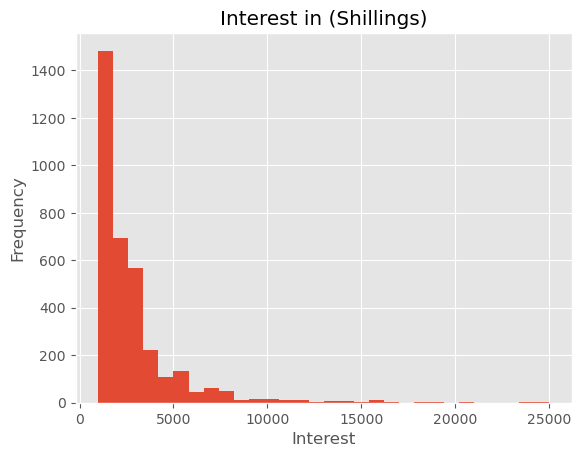

In [27]:
#Plotting Interests in Shillings to check its frequency histogram
ax=data['Interest'].plot(kind='hist'
                      , bins=30, 
                      title= 'Interest in (Shillings)')
ax.set_xlabel ('Interest')

Text(0.5, 0, 'Interest')

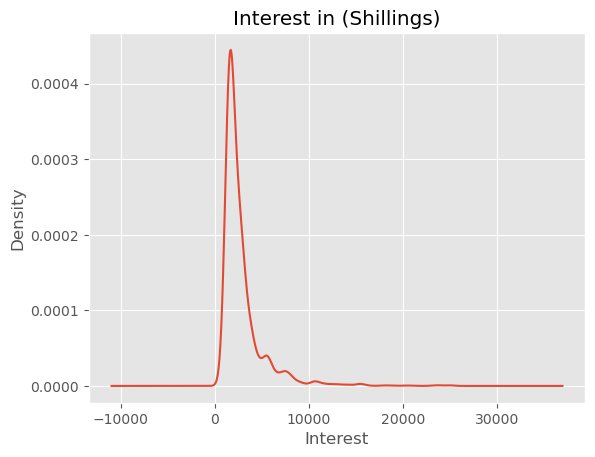

In [29]:
#Plotting Interests in Shillings to check its frequency KDE
ax=data['Interest'].plot(kind='kde'
                      , title= 'Interest in (Shillings)')
ax.set_xlabel ('Interest')

In [33]:
data['LoanLimit'].head(10).to_string()


'0     80000\n1     96000\n2     80000\n3    100000\n4    100000\n5     80000\n6     70000\n7     90000\n8    130000\n9    130000'

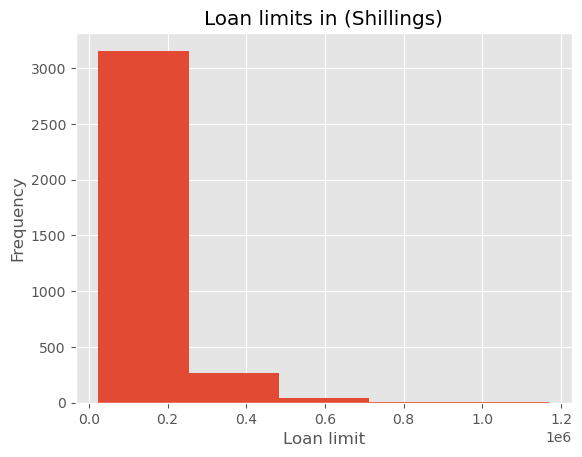

In [40]:
#Plotting (loan limit) to check its frequency histogram.
#The value here are scaled from the csv
ax=data['LoanLimit'].plot(kind='hist'
                      , bins=5, 
                      title= 'Loan limits in (Shillings)')

ax.set_xlabel ('Loan limit')
plt.show()

#I am trying to understand why they are scaled ? and what do the scaled values reflect?

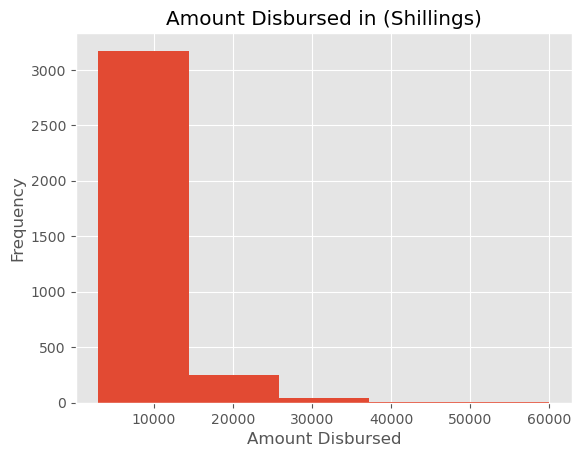

In [39]:
#Plotting (amount disbursed) to check its frequency histogram.

ax=data['AmountDisbursed'].plot(kind='hist'
                      , bins=5, 
                      title= 'Amount Disbursed in (Shillings)')

ax.set_xlabel ('Amount Disbursed')
plt.show()

<Axes: title={'center': ' Gender vs Interest'}, xlabel='Gender', ylabel='Interest'>

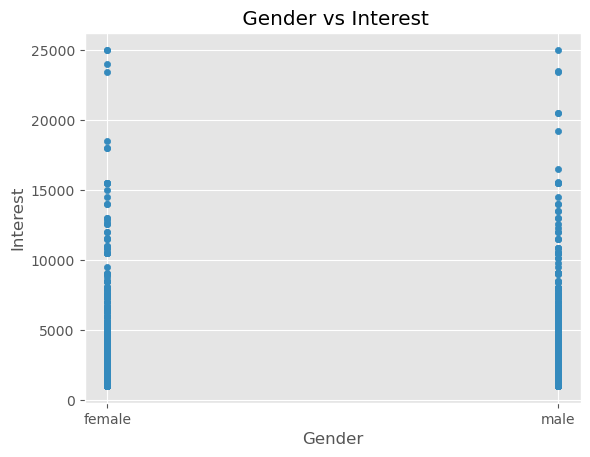

In [43]:
#sns.boxplot(x='Gender', y='Interest', data=data)
#plt.title('Interest by Gender')
#plt.show()


#Plotting interest vs Gender to check if the gender affects the amount of ineterst directly or indirectly.
data.plot (kind='scatter', x= 'Gender' , y = 'Interest' , title = ' Gender vs Interest')
# Most women tend to have interest lower than 10K.
# Most men have interest up to 15K
# Interest higher than 15K is rare for both genders

In [44]:
data['Gender'].value_counts()


Gender
male      1849
female    1623
Name: count, dtype: int64

<Axes: title={'center': ' missed instalments vs credit score'}, xlabel='MissedInstalments', ylabel='CreditScore'>

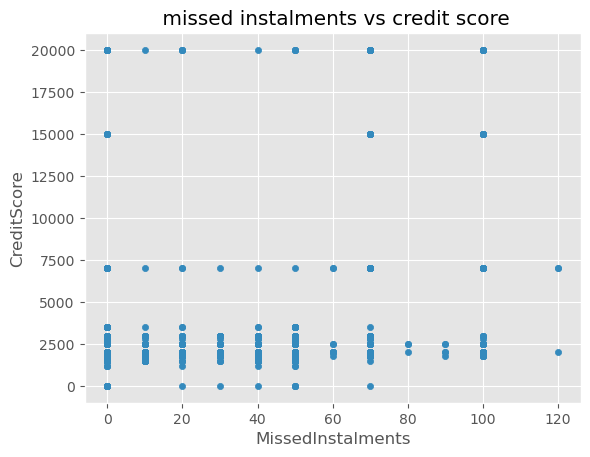

In [60]:
#Plotting credit score vs missed instalments 
data.plot (kind='scatter', x= 'MissedInstalments' , y = 'CreditScore' , title = ' missed instalments vs credit score')

#no clear corelation between credit score and missed instalments

<Axes: title={'center': ' missed instalments vs loan limit'}, xlabel='LoanLimit', ylabel='MissedInstalments'>

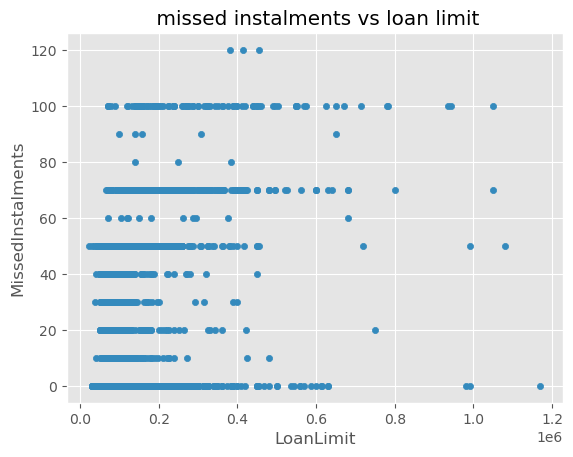

In [53]:
#Plotting interest vs Gender to check if the gender affects the amount of ineterst directly or indirectly.
data.plot (kind='scatter', x= 'LoanLimit' , y = 'MissedInstalments' , title = ' missed instalments vs loan limit')

In [65]:
data_corr= data[['MissedInstalments','LoanLimit','CreditScore','Interest','loan_repayment_total_paid','YearEstablished']].corr()

<Axes: >

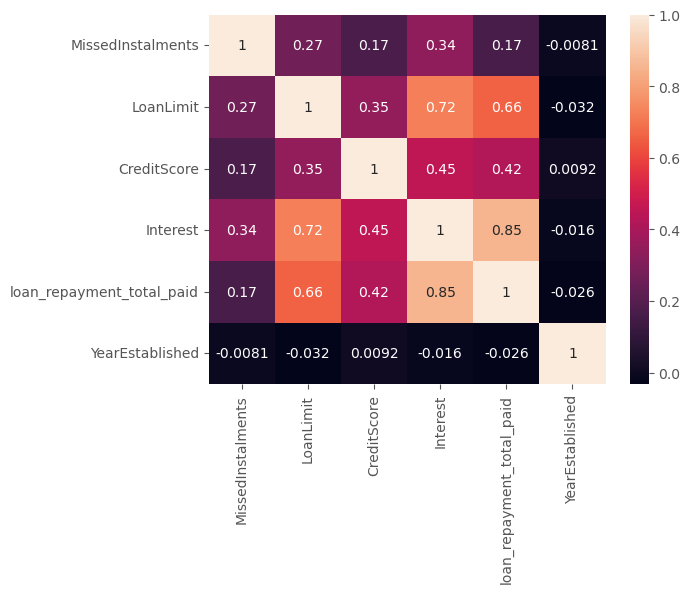

In [66]:
#Heat map for the features in data_corr
sns.heatmap(data_corr, annot=True)
# Total paid and interest are highly corelated, same for interest and credit score
# Year of establishment is irrelevant

# **Feature Engineering** 

## 1. This feature (Business performance) is an estimation for the business profitability. (High or Low)
### Insight:

### a- The heat map proved that the feature is irrelevant. However, as many other features it is a behavorial one, so it can't be judged by linearity using heat map. In real world it is quite important. E.g. a business about to go bankruft will not be able to pay its loans.

### b- In general, the heatmap is a bad way to test features that are related to a Threshold. (e.g. if the customer used 80% of loan limit, he tends to be risky) 

### c- Only repayment ratio is slightly correlated to interest

In [118]:
data['Repayment_Ratio'] = (
    data['loan_repayment_total_paid'] / data['AmountDisbursed']
)

In [122]:
data['Business_Performance'] = (data['Repayment_Ratio'] >= 1.2).astype(int)

In [146]:
#Correcting loan limit in the csv
data['LoanLimit'] = data['LoanLimit'] / 10


In [147]:
data[['AmountDisbursed','LoanLimit','Interest','Business_Performance', 'Business_Performance']].head(10)


,AmountDisbursed,LoanLimit,Interest,Business_Performance,Business_Performance
0,6000,8000.0,1750,0,0
1,4000,9600.0,1250,0,0
2,4000,8000.0,1250,0,0
3,4000,10000.0,1250,0,0
4,4000,10000.0,1250,0,0
5,4000,8000.0,1250,0,0
6,4000,7000.0,1250,0,0
7,4000,9000.0,1250,0,0
8,4000,13000.0,1250,0,0
9,4000,13000.0,1250,0,0


In [124]:
data['Business_Performance'].value_counts()


Business_Performance
1    2897
0     575
Name: count, dtype: int64

In [148]:
#data_corr_featured= data[['AmountDisbursed','LoanLimit','Interest','Business_Performance']].corr()
data_corr_featured = data[[
    'AmountDisbursed',
    'Repayment_Ratio',
    'LoanLimit',
    'Business_Performance',
    'Interest'
]].corr(method='spearman')

<Axes: >

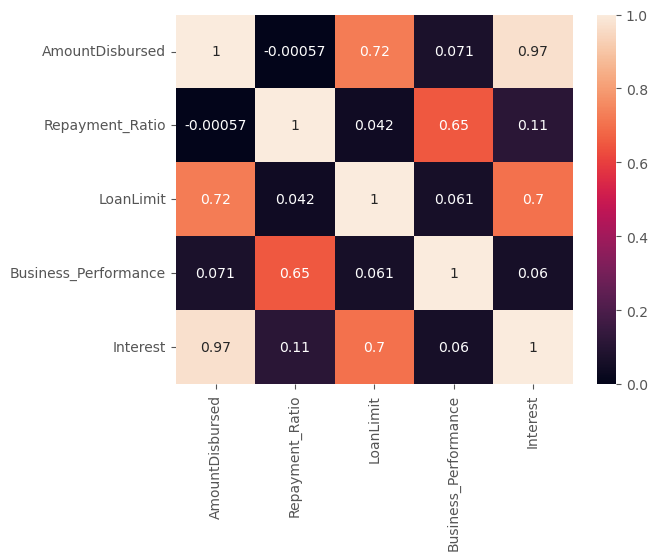

In [149]:
sns.heatmap(data_corr_featured, annot=True)

## 2.Loan Untilisation : How much of the approved limit was actually used ?

### Insight:
### a- Loan limit vs loan utilization: Borrowers who are approved for larger limits tend to use a smaller percentage of that limit.
### b- Loan utilization vs Amount disbursed or interst is slightly relevant

In [150]:
#How much of the approved limit was actually used
data['Loan_Utilisation'] = data['AmountDisbursed'] / data['LoanLimit']


In [151]:
data[['AmountDisbursed', 'Interest', 'LoanLimit', 'Loan_Utilisation']].head(10)


,AmountDisbursed,Interest,LoanLimit,Loan_Utilisation
0,6000,1750,8000.0,0.750000
1,4000,1250,9600.0,0.416667
2,4000,1250,8000.0,0.500000
3,4000,1250,10000.0,0.400000
4,4000,1250,10000.0,0.400000
5,4000,1250,8000.0,0.500000
6,4000,1250,7000.0,0.571429
7,4000,1250,9000.0,0.444444
8,4000,1250,13000.0,0.307692
9,4000,1250,13000.0,0.307692


In [152]:
data_corr_featured = data[[
    'AmountDisbursed',
    'LoanLimit',
    'Loan_Utilisation',
    'Interest'
]].corr(method='spearman')

<Axes: >

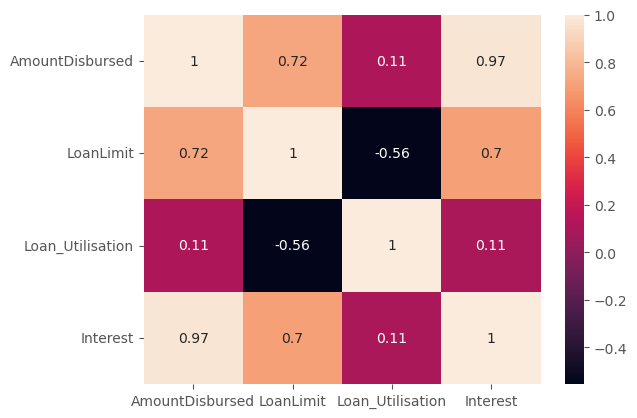

In [153]:
sns.heatmap(data_corr_featured, annot=True)
#loan limit vs loan utilization: Borrowers who are approved for larger limits tend to use a smaller percentage of that limit.

## 3.Financial stress: After how many missed installments is the customer a potential risk?
### Insight:
### - Missing more than 3 installment means the customer is a potential risk. The vaule 3 is chosen by me, based on trials counting how many customers will be considered risky at different threshold values.

In [161]:
#Correcting loan limit in the csv
data['MissedInstalments'] = data['MissedInstalments'] / 10


In [163]:
data[['AmountDisbursed', 'Interest', 'LoanLimit', 'MissedInstalments']].head(10)


,AmountDisbursed,Interest,LoanLimit,MissedInstalments
0,6000,1750,8000.0,5.0
1,4000,1250,9600.0,4.0
2,4000,1250,8000.0,4.0
3,4000,1250,10000.0,4.0
4,4000,1250,10000.0,4.0
5,4000,1250,8000.0,4.0
6,4000,1250,7000.0,5.0
7,4000,1250,9000.0,5.0
8,4000,1250,13000.0,2.0
9,4000,1250,13000.0,4.0


In [172]:
#Financial Stress / Risk Indicator feature
# basically if the customer missed more than 3 payments, then this refers to a high potential risk.
data['Financial_Stress'] = (data['MissedInstalments'] > 3).astype(int)



In [173]:
data['Financial_Stress'].value_counts()


Financial_Stress
0    2069
1    1403
Name: count, dtype: int64

In [174]:
data_corr_featured = data[[
    'AmountDisbursed',
    'LoanLimit',
    'Financial_Stress',
    'Interest'
]].corr(method='spearman')

<Axes: >

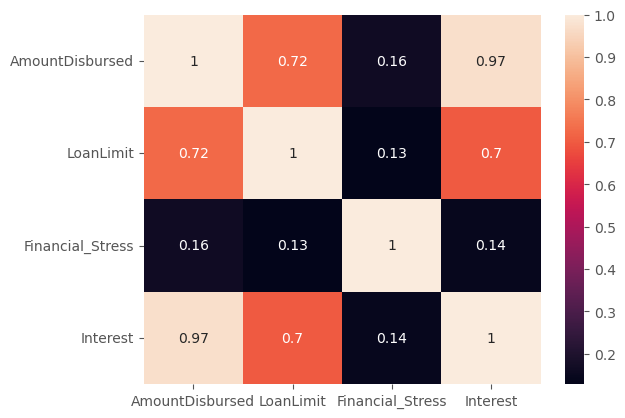

In [175]:
sns.heatmap(data_corr_featured, annot=True)
#loan limit vs loan utilization: Borrowers who are approved for larger limits tend to use a smaller percentage of that limit.

### 4. Checking customer's repayment behaviour (regularity)
#### - Repayment regularity is important, but it is not linearly correlated with loan limit or interst. So Coorelation map is not a reference to judge such a behaviour in this case . (behavourial feature)

In [181]:
data['Product_num'] = (
    data['Product']
      .astype(str)
      .str.extract(r'(\d+)')[0]
      .astype(float)
)

In [182]:
data[['AmountDisbursed', 'Interest', 'LoanLimit', 'Product_num']].head(10)


,AmountDisbursed,Interest,LoanLimit,Product_num
0,6000,1750,8000.0,5.0
1,4000,1250,9600.0,5.0
2,4000,1250,8000.0,5.0
3,4000,1250,10000.0,5.0
4,4000,1250,10000.0,5.0
5,4000,1250,8000.0,5.0
6,4000,1250,7000.0,5.0
7,4000,1250,9000.0,5.0
8,4000,1250,13000.0,5.0
9,4000,1250,13000.0,5.0


In [183]:
data['Repayment_Regularity'] = (
    data['loan_repayment_txn_count'] / data['Product_num']
)

In [193]:
data_corr_featured = data[[
    'AmountDisbursed',
    'LoanLimit',
    'Repayment_Regularity',
    'Interest'
]].corr(method='spearman')

<Axes: >

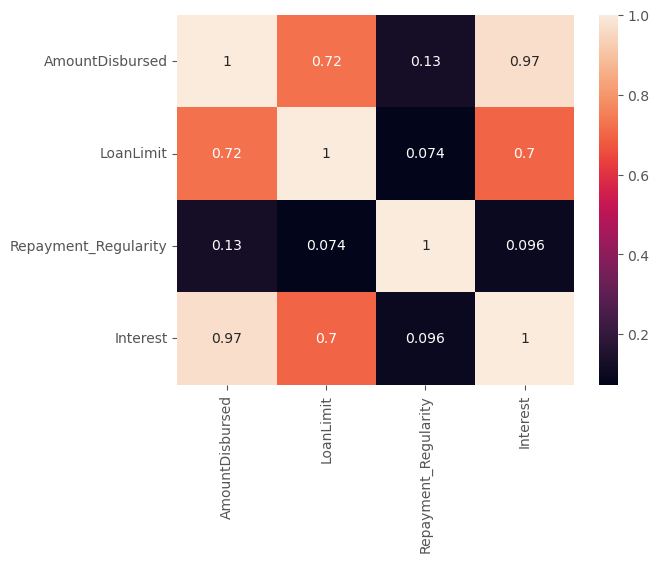

In [194]:
sns.heatmap(data_corr_featured, annot=True)
#loan limit vs loan utilization: Borrowers wh<o are approved for larger limits tend to use a smaller percentage of that limit.

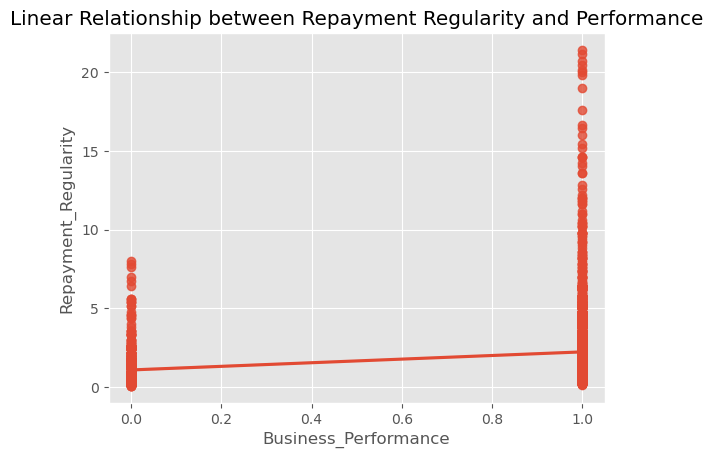

In [195]:

sns.regplot(
    x='Business_Performance',
    y='Repayment_Regularity',
    data=data,
    logistic=False
)
plt.title('Linear Relationship between Repayment Regularity and Performance')
plt.show()

## 5.Effective_loand_cost:  How expensive the loan is for the borrower relative to the amount borrowed? (borrower's prespective)
### Insights:
### -  The higher the interst and amount disbursed the more expenesive the loan is for the customer. Same applies for loan limit ( logical)

In [205]:
data['Effective_Loan_Cost'] = (
    data['Interest'] / data['AmountDisbursed']
)

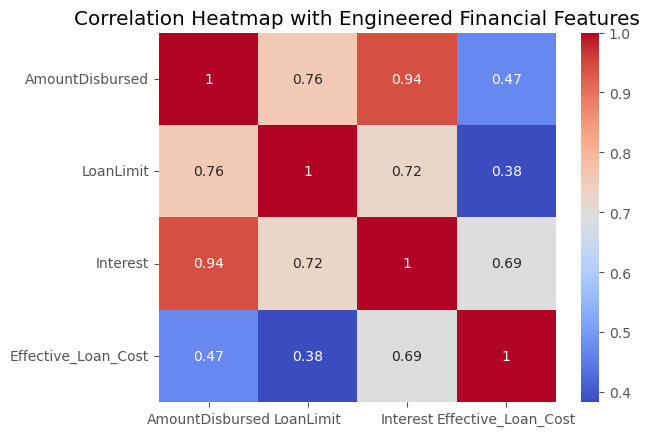

In [206]:
heat_features = data[[
    'AmountDisbursed',
    'LoanLimit',
    'Interest',
    'Effective_Loan_Cost',
]]

sns.heatmap(
    heat_features.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap with Engineered Financial Features')
plt.show()

## 6.Capital at risk: The amount of money the company can still lose 
## Insights:
### a- Larger loans tend to have more repayments already made, so less remaining unrecovered principal.
### b- Borrowers approved for higher limits tend to have lower remaining exposure.
### c- Loans with higher interest tend to have less capital still at risk.


In [212]:
data['Capital_At_Risk'] = (
    data['AmountDisbursed'] - data['loan_repayment_total_paid']
)

In [213]:
data_corr_featured = data[[
    'AmountDisbursed',
    'LoanLimit',
    'Capital_At_Risk',
    'Interest'
]].corr(method='spearman')

<Axes: >

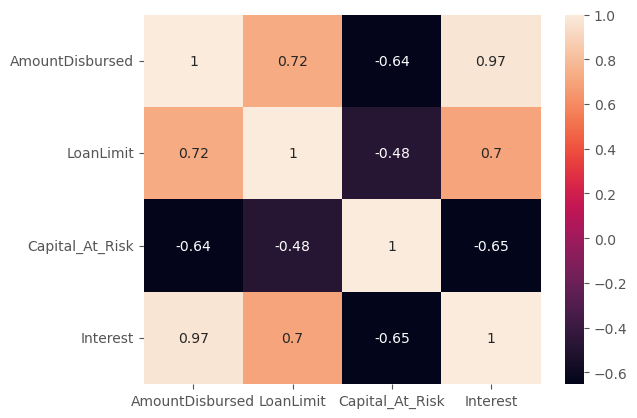

In [214]:
sns.heatmap(data_corr_featured, annot=True)
#loan limit vs loan utilization: Borrowers wh<o are approved for larger limits tend to use a smaller percentage of that limit.

## 7. Credit pressure index
### Based on following factors:
### a-CreditScore → risk quality
### b-YearEstablished → stability / resilience
### c-AmountDisbursed → stress applied
### we assess: How large is this loan relative to what this business can realistically absorb?

### Insight:
### - The feature shows high relevance and linearty with (Amound disbursed, loan limit, interst)

In [218]:
data['Business_Age'] = 2025 - data['YearEstablished']

data['Credit_Pressure_Index'] = (
    data['AmountDisbursed']
    / (data['CreditScore'] * data['Business_Age'])
)

In [219]:
data_corr_featured = data[[
    'AmountDisbursed',
    'LoanLimit',
    'Credit_Pressure_Index',
    'Interest'
]].corr(method='spearman')

<Axes: >

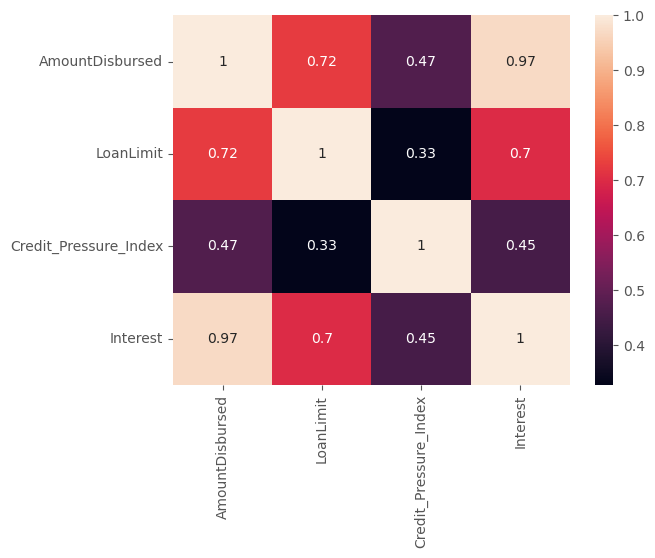

In [220]:
sns.heatmap(data_corr_featured, annot=True)
#loan limit vs loan utilization: Borrowers wh<o are approved for larger limits tend to use a smaller percentage of that limit.